# Abalone Age Regression Model Using Deep Learning

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [4]:
train.isna().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
train = train.drop(['id'], axis=1)

In [6]:
test = pd.read_csv('test.csv')
test.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60411 non-null  int64  
 1   Sex             60411 non-null  object 
 2   Length          60411 non-null  float64
 3   Diameter        60411 non-null  float64
 4   Height          60411 non-null  float64
 5   Whole weight    60411 non-null  float64
 6   Whole weight.1  60411 non-null  float64
 7   Whole weight.2  60411 non-null  float64
 8   Shell weight    60411 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.1+ MB


In [8]:
test.isna().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
dtype: int64

# Exploratory Data Analysis

### Summary Statistics

In [9]:
train.describe()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Distribution Exploration

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

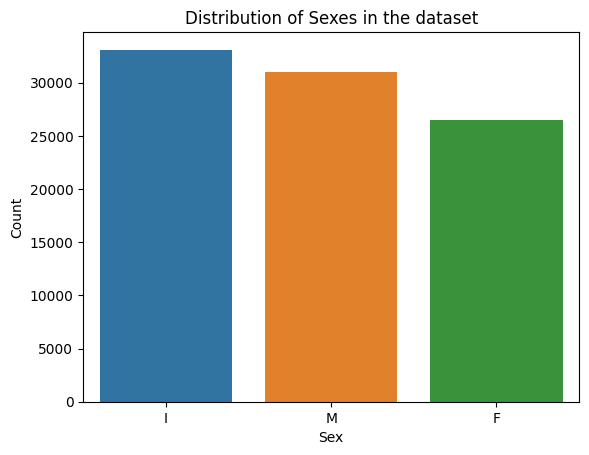

In [11]:
sex_counts = train['Sex'].value_counts()
sex_counts = sex_counts.sort_values(ascending=False)

sns.barplot(x=sex_counts.index, y=sex_counts.values, hue=sex_counts.index)
plt.title('Distribution of Sexes in the dataset')
plt.ylabel('Count')
plt.xlabel('Sex')
plt.show()

In [12]:
def plot_histogram(data, feature, color):
    sns.histplot(data=data, x=feature, bins=30, color=color, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

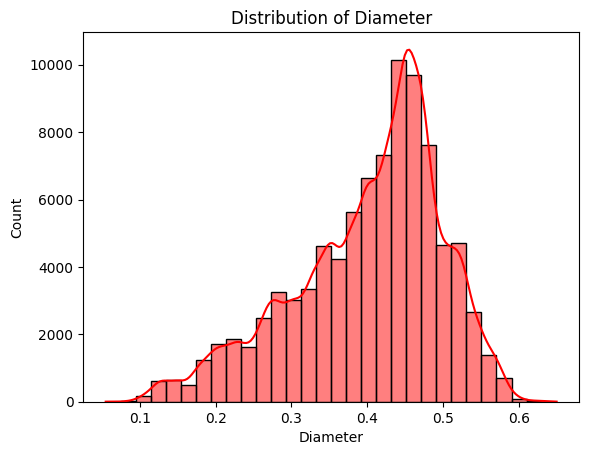

In [13]:
plot_histogram(train, 'Diameter', '#FF0000')

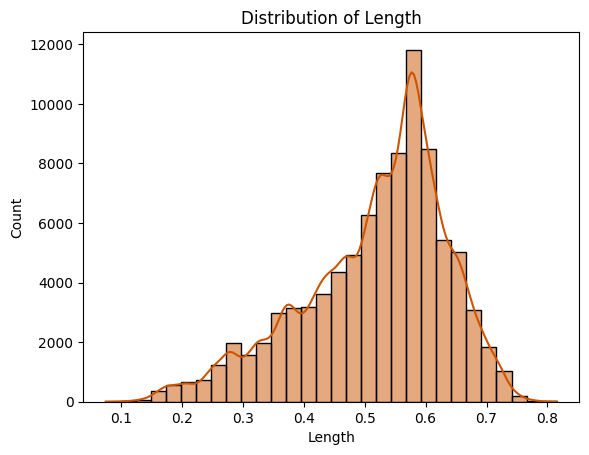

In [14]:
plot_histogram(train, 'Length', color='#CC5500')

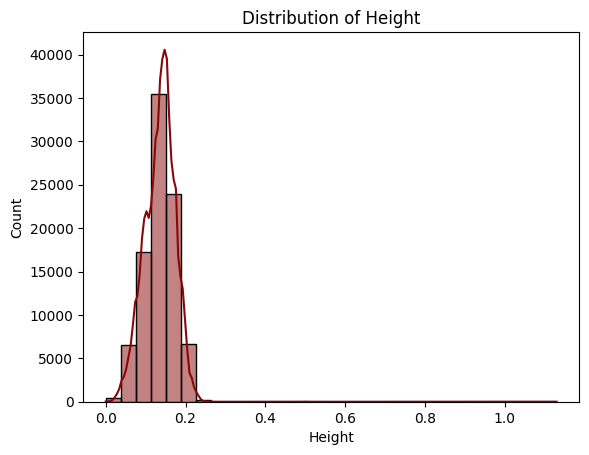

In [15]:
plot_histogram(train, 'Height', '#880808')

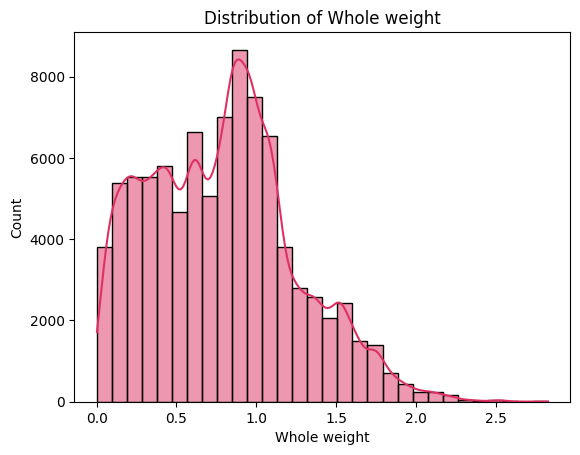

In [16]:
plot_histogram(train, 'Whole weight', '#DE3163')

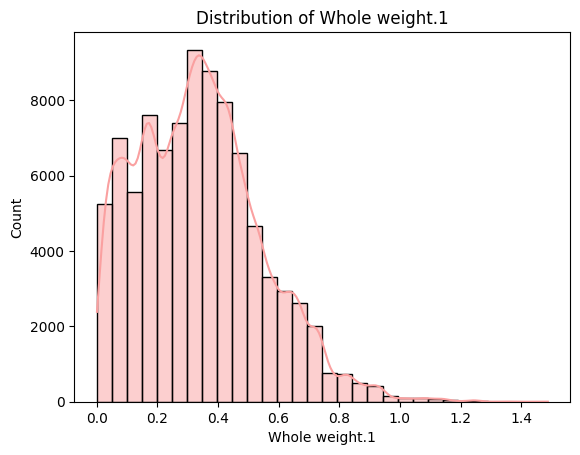

In [17]:
plot_histogram(train, 'Whole weight.1', '#FAA0A0')

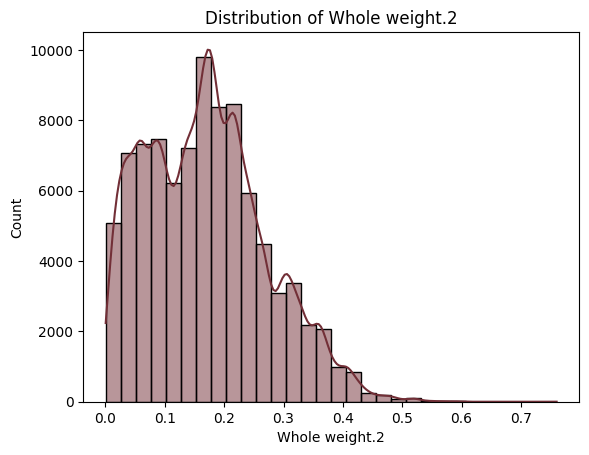

In [18]:
plot_histogram(train, 'Whole weight.2', '#722F37')

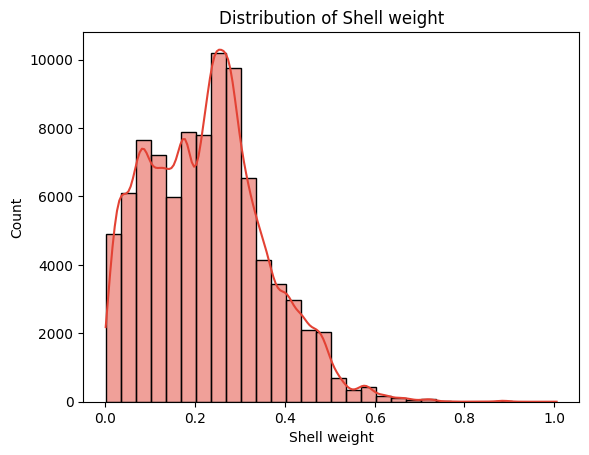

In [19]:
plot_histogram(train, 'Shell weight', '#E34234')

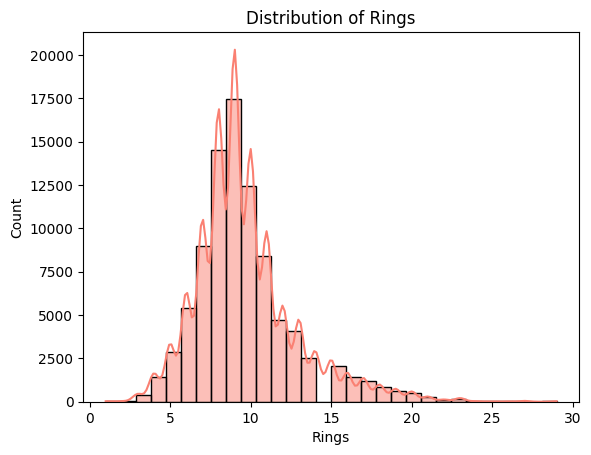

In [20]:
plot_histogram(train,  'Rings', '#FA8072')

### Correlation Analysis

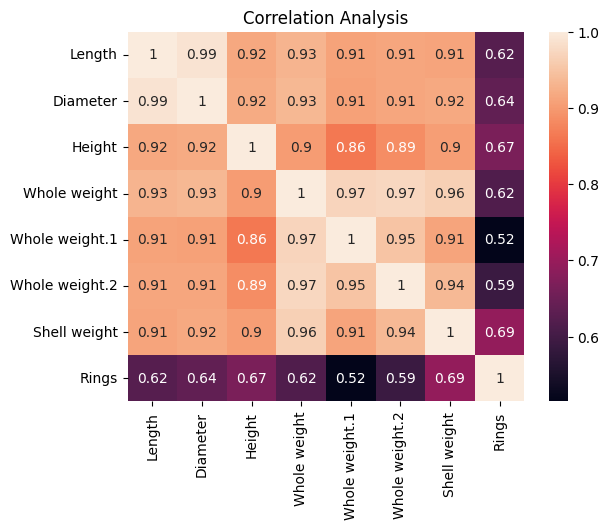

In [21]:
train_num = train.select_dtypes(['int', 'float'])
correlation = train_num.corr()

sns.heatmap(correlation, annot=True)
plt.title('Correlation Analysis')
plt.show()

# Data Preprocessing

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
import tensorflow as tf

In [23]:
X_train = train.drop(['Rings'], axis=1)
y_train = train['Rings']

In [24]:
class DataPipeline():
    def __init__(self, data):

        self.data = data
        self.num_features = self.data.select_dtypes(['int', 'float']).columns
        self.cat_features = self.data.select_dtypes('object').columns    
        self.num_pipeline = make_pipeline(StandardScaler())
        self.cat_pipeline = make_pipeline(OneHotEncoder())
        self.pipeline = ColumnTransformer([
            ('num', self.num_pipeline, self.num_features),
            ('cat', self.cat_pipeline, self.cat_features)
        ])

    def transform(self):
        return tf.convert_to_tensor(self.pipeline.fit_transform(self.data))


In [25]:
X_train = DataPipeline(X_train).transform()
y_train = tf.convert_to_tensor(y_train)

In [26]:
X_train

<tf.Tensor: shape=(90615, 10), dtype=float64, numpy=
array([[ 0.27831734,  0.28891218,  0.38245082, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.95504436,  0.90099607,  0.25089733, ...,  1.        ,
         0.        ,  0.        ],
       [-3.02072689, -2.97553525, -2.90638649, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.69447776, -0.73122764, -1.0646376 , ...,  0.        ,
         1.        ,  0.        ],
       [-1.45579566, -1.34331154, -1.59085157, ...,  0.        ,
         1.        ,  0.        ],
       [-0.77906863, -0.78223464, -0.9330841 , ...,  0.        ,
         1.        ,  0.        ]])>

In [27]:
y_train

<tf.Tensor: shape=(90615,), dtype=int64, numpy=array([11, 11,  6, ...,  6,  6,  8], dtype=int64)>

# Model Creation and Selection

In [28]:
from sklearn.metrics import mean_absolute_error

### Deep Learning Approach

In [ ]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2)

Model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(10,)),
    tf.keras.layers.Dense(1800, activation=leaky_relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1800, activation=leaky_relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(900, activation=leaky_relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(900, activation=leaky_relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(450, activation=leaky_relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(450, activation=leaky_relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(225, activation=leaky_relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation=leaky_relu)
])

Model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mean_absolute_error'],
    loss='mean_squared_error'
)

In [29]:
class StopCallback(tf.keras.callbacks.Callback):
    loss_threshold = None

    def __init__(self, threshold):
        self.loss_threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        if logs.get('mean_absolute_error') <= self.loss_threshold:
            self.model.stop_training = True


In [ ]:
Model.fit(X_train, y_train, epochs=1000, callbacks=[callback], batch_size=300)

In [ ]:
Model.save('AbloneAgeNN')

# Conclusion and Predictions

### Kaggle Predictions

In [ ]:
test_x = test.drop(['id'], axis=1)
test_x = DataPipeline(test_x).transform()

In [ ]:
submission_pred = Model.predict(test_x).round()
submission = pd.DataFrame()

submission['id'] = test['id']
submission['Rings'] = submission_pred

submission.to_csv('submission_1.csv', index=False)

In [30]:
Model = tf.keras.models.load_model('C:\\Users\\Tyron\\OneDrive\\Desktop\\Machine Learning Projects\\Machine-Learning-Projects\\Ablone_Age_Regression\\AbloneAgeNN')

In [33]:
callback = StopCallback(0.1)

In [34]:
Model.fit(X_train, y_train, epochs=5000, batch_size=300, callbacks=[callback])

Epoch 1/5000
303/303 [==============================] - 39s 129ms/step - loss: 2.4016 - mean_absolute_error: 1.0987
Epoch 2/5000
303/303 [==============================] - 40s 134ms/step - loss: 2.3920 - mean_absolute_error: 1.0991
Epoch 3/5000
303/303 [==============================] - 31s 102ms/step - loss: 2.3989 - mean_absolute_error: 1.1008
Epoch 4/5000
303/303 [==============================] - 30s 100ms/step - loss: 2.4200 - mean_absolute_error: 1.1012
Epoch 5/5000
303/303 [==============================] - 31s 101ms/step - loss: 2.4101 - mean_absolute_error: 1.1005
Epoch 6/5000
303/303 [==============================] - 31s 103ms/step - loss: 2.4006 - mean_absolute_error: 1.0977
Epoch 7/5000
303/303 [==============================] - 31s 103ms/step - loss: 2.4145 - mean_absolute_error: 1.0987
Epoch 8/5000
303/303 [==============================] - 32s 105ms/step - loss: 2.3945 - mean_absolute_error: 1.0976
Epoch 9/5000
303/303 [==============================] - 31s 103ms/step -

In [ ]:
Model.save('AbloneAgeNN_V2')

### Kaggle Results

The predictions were evaluated using Root Mean Squared Logarithmic Error, the model scored an impressive score of 0.16430 and placed my model 384th in the leaderboard